## TF-IDF Text Representation
**TF-IDF (Term Frequency-Inverse Document Frequency)** is a statistical measure used to evaluate the importance of a word in a document or corpus. It is a numerical representation of how relevant a term is in a given document or corpus.

The **TF-IDF** score is calculated by multiplying the **term frequency (TF)** with the **inverse document frequency (IDF)**. The term frequency measures how frequently a term appears in a document, while the inverse document frequency measures how important a term is in the entire corpus. 

We use **TF-IDF** for text representation because it helps to identify the most important words in a document or corpus. By assigning higher weights to the most relevant terms, we can effectively summarize and categorize large amounts of text data. This can be useful in various applications such as **information retrieval, sentiment analysis**, and text **classification**.

### What is TF-IDF?
* TF stands for **Term Frequency** and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

        Term Frequency(TF) = [number of times word appeared / total no of words in a document]


* Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

* IDF stands for **Inverse Document Frequency** and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

        Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

* In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

#### Finally:

          TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

<img src = "img.png" width = "800px" height = "600px"></img>

<img src = "img1.png" width = "800px" height = "600px"></img>

<img src = "img2.png" width = "800px" height = "600px"></img>

<img src = "img3.png" width = "800px" height = "600px"></img>

<img src = "img4.png" width = "800px" height = "600px"></img>

* Sklearn uses slightely different formula for IDF to take into account the zero division possibility. They add constant 1 and in result they add 1 more time.

<img src = "img5.png" width = "800px" height = "600px"></img>

* Now let's talk about why we use log with **IDF?**

<img src = "img6.png" width = "800px" height = "600px"></img>

* The answer is taken from **Stack Overflow**:

<img src = "img7.png" width = "800px" height = "600px"></img>

<img src = "img8.png" width = "800px" height = "600px"></img>

### Limitation of TF-IDF Model

* Similar to to previous model like **Bag of Words**, **Bag of n-grams** and **One Hot Encoding**, **TF-IDF** has the following limitations:
    1. As n increased, dimensionality and sparsity increases.
    2. Doesn't capture relationships between words.
    3. Doesn't address Out Of Vocabulary (OOV) problem.
    

In [1]:
# So for implementation of TF-IDF, first we import 'TfidfVectorizer':
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Next we take one sample corpus:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [3]:
# Next we create an instance of TfidfVectorizer class, and then fit the corpus and transform it. 

v = TfidfVectorizer()                   # TfidfVectorizer class instance
v.fit(corpus)                           # calling fit() method to create vectors
transform_output = v.transform(corpus)  # This complete the vector creation.

# Instead of last two commands we can use ' transform_output = v.fit_transform(corpus)'

In [4]:
# So now the v object got the vocabulary, so we can print the vocabulary:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [6]:
# If we supply 'v' to 'dir()', we'll see all the members:
# dir(v)

In [7]:
# To print the IDF score of each word, we need to either iterate through this particular directory 'v.vocabulary' or if we 
# want to go on sequence of the words and orderly get the word idf scores.
# we'll follow the 2nd method:

all_feature_names = v.get_feature_names_out()  # Will print all the words (vocabulary) in order.

for word in all_feature_names:
    
    indx = v.vocabulary_.get(word)             # Will get the index for each word from vocabulary

    idf_score = v.idf_[indx]                   # will get you the score of all words
    
    print(f"{word} : {idf_score}") 

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [8]:
# So from the scores we know that 'is' has less scores because it's common term and is repeated in majority of sentences 
# and it's not more important. But if you see 'Amazon', 'Tesla' or 'Apple', they have big scores, because they're important.
# So now to print the whole 'TF-IDF' scores. before that let's see the first two sentences of the corpus:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [12]:
# So we want to print the coresponding 'TF-IDF' vectors for these two sentences.
# So we know it's present in the transform_output.
print(transform_output.toarray()[:2])

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]]


* So now if we check the 'is' TF-IDF score which is 0.11527033, is on index 17 (we know it from cell[7]) in the first sentence. The 'Thor' TF-IDF score is 0.24266547 which is more than 'is' scores. So we see based on importance of the words TF-IDF assigns the scores. 

### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories
Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

This data consists of two columns.

<img src = "img9.png" width = "900px" height = "400px"></img>

* The **dataset** simply has two columns:
* **Text**: Description of an item sold on e-commerce website
* **Label**: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [13]:
# So we import the pandas and read the dataset:
import pandas as pd

df = pd.read_csv("Ecommerce_data.csv")
df.head(5)

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [14]:
# To see the shape of the dataset:
print(df.shape)

(24000, 2)


In [15]:
# T check the distribution of labels for imbalance issue: 
df['label'].value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

* From the above, we can see that almost all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [17]:
# Now we add the 'labels' category into a new column with conversion to a number: 

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

df.sample(5)

,Text,label,label_num
13400,Cooler Master Elite 130 Mini-ITX Computer Case...,Electronics,2
5815,Younky Unisex Combo Of Uv Protected Aviator St...,Clothing & Accessories,3
16796,Farraige Lapcare Chillmate Ergonomic Laptop Co...,Electronics,2
1343,Imation 4.7GB IMATION DVD RW 3 Pack Imation 4....,Electronics,2
910,BRATS N BEAUTY - Army/Military Cap for BOY Nav...,Clothing & Accessories,3


In [18]:
# Next we call to train_test_split method to split the dataset:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2,               # 80% samples will go to train dataset.
    random_state=2022,
    stratify=df.label_num
)

In [19]:
# To see the shape of both train and test samples:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [20]:
# To see balance of y_train, we do as:
y_train.value_counts()

0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

In [21]:
# Same thing for y_test:
y_test.value_counts()

0    1200
2    1200
3    1200
1    1200
Name: label_num, dtype: int64

**Attempt 1 :**

    1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

    * use TF-IDF for pre-processing the text.
    * use KNN as the classifier
    * print the classification report.

In [22]:
# Now we'll use few classifiers from 'sklearn' to train the model. First we'll use KNN, then RF and then NB. Just to check 
# the performance of difference classifiers...

# Necesary libraries:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [23]:
# Let's see a few sentence from corpus:
X_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [24]:
# To see the actual result for first five sentences as we displayed upper.
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [25]:
# Our model prediction for first five samples:
y_pred[:5]

array([0, 2, 3, 1, 0], dtype=int64)

* So we see out of 5 we got three correct predictions.

* **Attempt 2 :**

      1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

* **Note:**

    * use TF-IDF for pre-processing the text.
    * use **MultinomialNB** as the classifier.
    * print the classification report.

In [26]:
# So next we use 'MultinomialNB' classifier.
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



* The result are looking almost similar...

* **Attempt 3 :**

    1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

* **Note:**

    * use TF-IDF for pre-processing the text.
    * use **Random Forest** as the classifier.
    * print the classification report.

In [27]:
# Next we try Random Fores:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),      
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



* So we see that the **Random Forest** classifier is giving us the best performance.

* **Use text pre-processing to remove stop words, punctuations and apply lemmatization.**

In [28]:
# Now when we trained the previous models we didn't remove stop words, lemmatizations and so on...
# Here we will create a function wich preprocess the text and then we'll train the model again but usng preprocessed text.
import spacy
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:  # remove the stop words and punctuations...
            continue
        filtered_tokens.append(token.lemma_) # It convert word to its base form.
    
    return " ".join(filtered_tokens)         # It will return simple preprocessed text.

In [29]:
# Now we create a new column which will hold preprocessed text, and for that we apply 'apply()' function.
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [30]:
# Now let's print few samples and see the changes:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


In [31]:
# First sample from raw text:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [32]:
# First sample from preprocessed text:
df.preprocessed_txt[0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [33]:
# Now let's again split the train and test samples of the preprocessed text for model training:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, 
    random_state=2022,
    stratify=df.label_num
)

In [34]:
# Let's again train the Random Forest classifier:
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



* If you compare above classification report with respect to **RandomForest** Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

* **Plot confusion matrix**

In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1158,   11,   14,   17],
       [  20, 1171,    6,    3],
       [  21,    8, 1166,    5],
       [   6,    4,    1, 1189]], dtype=int64)

Text(69.0, 0.5, 'Truth')

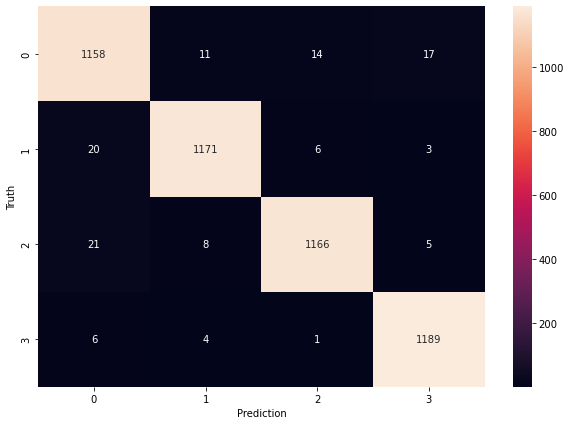

In [36]:
# Confusion matrix:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Exercise
* **A beautiful exercise is given...**